## Warmup for Week 4 - Naive Bayes


### Naive Bayes Exercise
**Dataset:** auto-mpg.data (provided)
I have also included the description of the dataset file (auto-mpg.names), just in case you need it.

**Objective:** Use a Naive Bayes algoritm to determine the mpg for the given dataset.

* Clean the datset as you see fit.
* A little bit of EDA goes a long way!
* Split your data into 75/25 for this exercise.
* Perform the model evaluation
* Valuate you model's accuracy
* Any interesting findings?


## 1.Importing Libraries

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Load the dataset with appropriate column names

In [8]:
cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv('auto-mpg.data', sep=r'\s+', names=cols, na_values='?').dropna()

### 3.Drop the 'car_name' column and convert data types if needed

In [9]:
df = df.drop('car_name', axis=1)

### 4.Create a binary target variable for mpg (above median = 1, else 0)

In [10]:
df['mpg_label'] = (df['mpg'] > df['mpg'].median()).astype(int)
df = df.drop('mpg', axis=1)

###  5: Exploratory Data Analysis (EDA)
### Histogram of the target variable

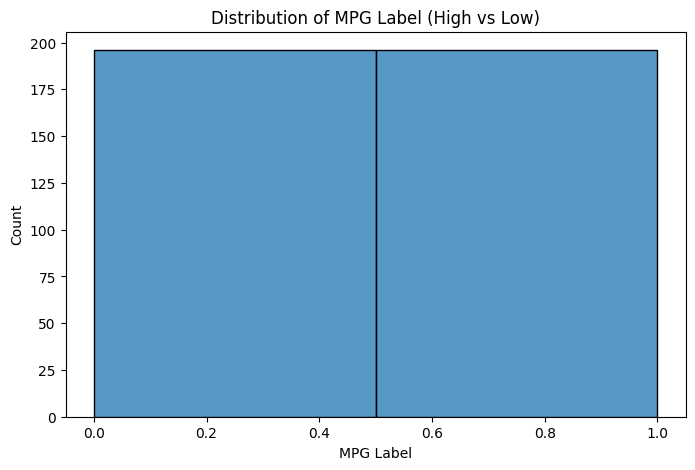

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['mpg_label'], bins=2, kde=False)
plt.title('Distribution of MPG Label (High vs Low)')
plt.xlabel('MPG Label')
plt.ylabel('Count')
plt.show()

### Pairplot of features with target hue

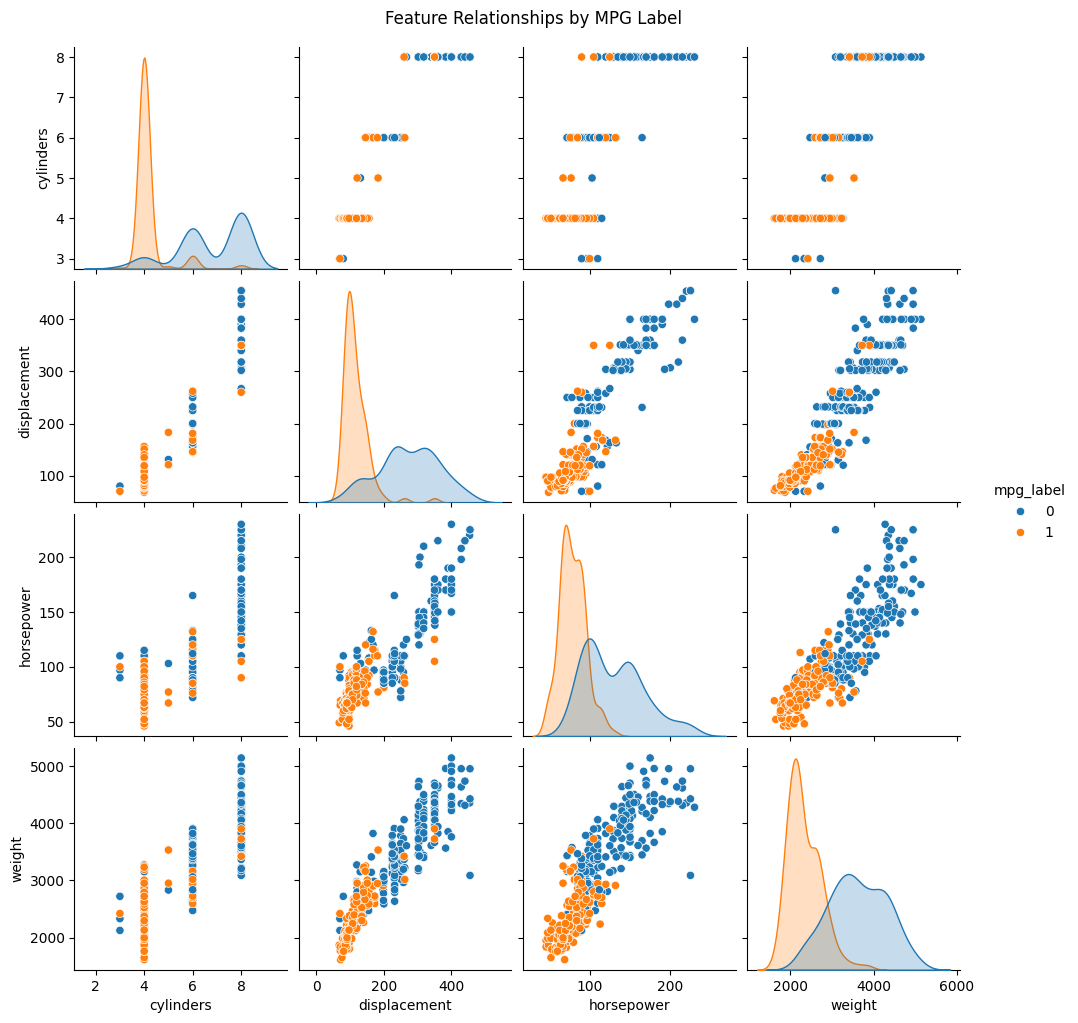

In [12]:
sns.pairplot(df[['cylinders','displacement','horsepower','weight','mpg_label']], hue='mpg_label')
plt.suptitle('Feature Relationships by MPG Label', y=1.02)
plt.show()

 ### Correlation heatmap

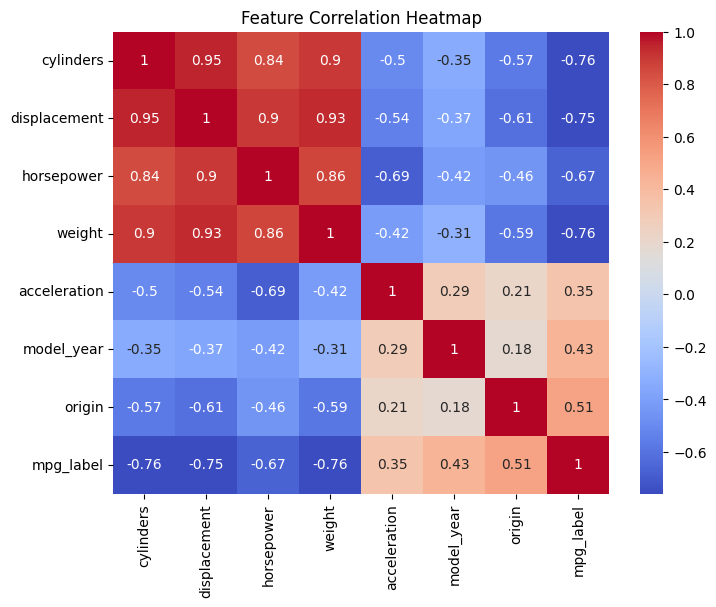

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### 6: Prepare data for modeling by splitting features and target

In [14]:
X = df.drop('mpg_label', axis=1)
y = df['mpg_label']

plit dataset into training (75%) and testing (25%)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

###  8: Train Naive Bayes classifier


In [16]:
model = GaussianNB()
model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


###  9: Predict on test set and evaluate

In [17]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8673469387755102

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87        54
           1       0.79      0.95      0.87        44

    accuracy                           0.87        98
   macro avg       0.87      0.88      0.87        98
weighted avg       0.88      0.87      0.87        98


Confusion Matrix:
 [[43 11]
 [ 2 42]]
